In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl

exchange='WIKI'
ticker='AMZN'

stock = quandl.get('%s/%s' % (exchange, ticker),api_key='xCpdYQzqjxgooYJ7zisz')

In [2]:
stock.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [14]:
import os

file_path = "./data/"+ticker+".csv"
directory = os.path.dirname(file_path)

try:
    os.stat(directory)
except:
    os.mkdir(directory)       
with open('.//data//'+ticker+'.csv','wb') as csvFile: #EDIT - because comment.
    writer = csv.writer(csvFile)
    writer.writerows(stock)


In [ ]:

import csv
def LoadFile(ticker,exchange='WIKI'):
  if os.path.exists('./data/'+ticker):
    with open(os.path.join("path", "to", ticker+".csv"), 'rU') as file:
        stock = csv.reader(file)
  else:  
      stock = quandl.get('%s/%s' % (exchange, ticker),api_key='xCpdYQzqjxgooYJ7zisz')
        
  fileList = ['quote_in.csv', 'quote_out.csv', 'trade_in.csv', 'trade_out.csv']
  listDir = os.listdir('./intraday')
  listDir.sort()
  return listDir == fileList

In [4]:
data=stock.copy()
data.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


In [134]:
max_date=max(data.index)
end_date=max_date-pd.DateOffset(years=1)
start_date=end_date-pd.DateOffset(years=3)

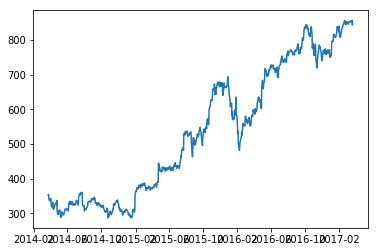

In [135]:

plt.plot(data['Close'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


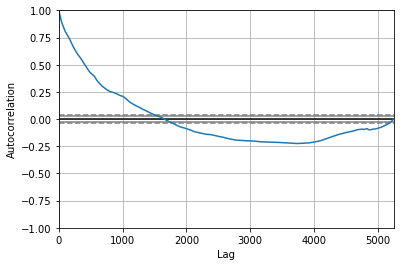

In [5]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(data['Close'])
plt.show()

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


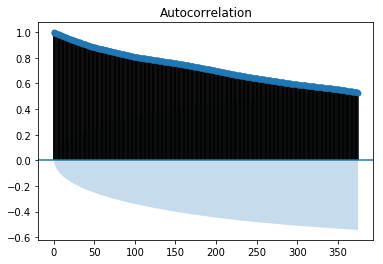

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['Close'], lags=375)
plt.show()

In [138]:
data=data[(data.index>start_date)&(data.index<=end_date)]

In [139]:
data.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-03-16,576.64,581.32,571.14,574.27,3537669.0,0.0,1.0,576.64,581.32,571.14,574.27,3537669.0
2016-03-17,569.51,571.40,555.01,559.44,5928105.0,0.0,1.0,569.51,571.40,555.01,559.44,5928105.0
2016-03-18,560.94,562.33,546.09,552.08,7296885.0,0.0,1.0,560.94,562.33,546.09,552.08,7296885.0
2016-03-21,548.91,555.24,538.58,553.98,5155732.0,0.0,1.0,548.91,555.24,538.58,553.98,5155732.0
2016-03-22,545.11,562.76,545.05,560.48,4000564.0,0.0,1.0,545.11,562.76,545.05,560.48,4000564.0


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: 
.resample() is now a deferred operation
You called reset_index(...) on this deferred object which materialized it into a series
by implicitly taking the mean.  Use .resample(...).mean() instead
  """


          Date  Adj. Close
0   2014-03-24  351.850000
1   2014-03-25  354.710000
2   2014-03-26  343.410000
3   2014-03-27  338.470000
4   2014-03-28  338.290000
5   2014-03-29  337.648333
6   2014-03-30  337.006667
7   2014-03-31  336.365000
8   2014-04-01  342.990000
9   2014-04-02  341.960000
10  2014-04-03  333.620000
11  2014-04-04  323.000000
12  2014-04-05  321.253333
13  2014-04-06  319.506667
14  2014-04-07  317.760000
15  2014-04-08  327.070000
16  2014-04-09  331.805000
17  2014-04-10  317.110000
18  2014-04-11  311.730000
19  2014-04-12  313.123333
20  2014-04-13  314.516667
21  2014-04-14  315.910000
22  2014-04-15  316.080000
23  2014-04-16  323.680000
24  2014-04-17  324.910000
25  2014-04-18  326.400000
26  2014-04-19  327.890000
27  2014-04-20  329.380000
28  2014-04-21  330.870000
29  2014-04-22  329.320000
..         ...         ...
700 2016-02-22  559.500000
701 2016-02-23  552.940000
702 2016-02-24  554.040000
703 2016-02-25  555.150000
704 2016-02-26  555.230000
7

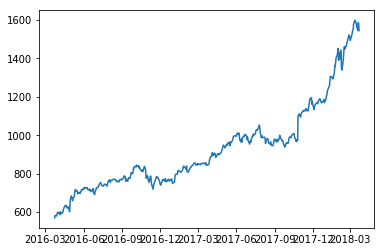

In [144]:
from statsmodels.tsa.ar_model import AR
train=data[(data.index>start_date)&(data.index<=end_date)]['Adj. Close']
test=stock[(stock.index>end_date)]['Adj. Close']
train = train.resample('D')
train = train.reset_index(level=0)
train = train.interpolate()
print train
plt.plot(test)
plt.show()

In [166]:
train.index=train['Date']
train1=train['Adj. Close']
print train1
model = AR(train1)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params
# walk forward over time steps in test
history = train1[len(train1)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Date
2014-03-24    351.850000
2014-03-25    354.710000
2014-03-26    343.410000
2014-03-27    338.470000
2014-03-28    338.290000
2014-03-29    337.648333
2014-03-30    337.006667
2014-03-31    336.365000
2014-04-01    342.990000
2014-04-02    341.960000
2014-04-03    333.620000
2014-04-04    323.000000
2014-04-05    321.253333
2014-04-06    319.506667
2014-04-07    317.760000
2014-04-08    327.070000
2014-04-09    331.805000
2014-04-10    317.110000
2014-04-11    311.730000
2014-04-12    313.123333
2014-04-13    314.516667
2014-04-14    315.910000
2014-04-15    316.080000
2014-04-16    323.680000
2014-04-17    324.910000
2014-04-18    326.400000
2014-04-19    327.890000
2014-04-20    329.380000
2014-04-21    330.870000
2014-04-22    329.320000
                 ...    
2016-02-22    559.500000
2016-02-23    552.940000
2016-02-24    554.040000
2016-02-25    555.150000
2016-02-26    555.230000
2016-02-27    554.326667
2016-02-28    553.423333
2016-02-29    552.520000
2016-03-01    579.04

predicted=847.524217, expected=845.040000
predicted=845.987797, expected=853.080000
predicted=854.194801, expected=848.910000
predicted=851.545093, expected=849.880000
predicted=848.137906, expected=846.610000
predicted=845.588829, expected=846.020000
predicted=845.550131, expected=850.500000
predicted=849.256845, expected=853.000000
predicted=852.885322, expected=852.460000
predicted=852.096847, expected=854.590000
predicted=852.462417, expected=852.530000
predicted=851.231086, expected=852.970000
predicted=852.132171, expected=853.420000
predicted=853.184504, expected=852.310000
predicted=851.797094, expected=856.970000
predicted=857.206585, expected=843.200000
predicted=842.859725, expected=848.060000
predicted=847.004683, expected=847.380000
predicted=846.866359, expected=845.610000
predicted=845.535126, expected=846.820000
predicted=847.486319, expected=856.000000
predicted=855.310388, expected=874.320000
predicted=874.296007, expected=876.340000
predicted=877.918929, expected=886

ValueError: view limit minimum -36838.75 is less than 1 and is an invalid Matplotlib date value. This often happens if you pass a non-datetime value to an axis that has datetime units

<Figure size 432x288 with 1 Axes>

In [154]:
train.index=train['Date']
train1=train['Adj. Close']
print train1
model = AR(train1)
model_fit = model.fit()
start=end_date
end=max_date
predictions = model_fit.predict(start, end,dynamic=False)
predictions1=model_fit.predict()

Date
2014-03-24    351.850000
2014-03-25    354.710000
2014-03-26    343.410000
2014-03-27    338.470000
2014-03-28    338.290000
2014-03-29    337.648333
2014-03-30    337.006667
2014-03-31    336.365000
2014-04-01    342.990000
2014-04-02    341.960000
2014-04-03    333.620000
2014-04-04    323.000000
2014-04-05    321.253333
2014-04-06    319.506667
2014-04-07    317.760000
2014-04-08    327.070000
2014-04-09    331.805000
2014-04-10    317.110000
2014-04-11    311.730000
2014-04-12    313.123333
2014-04-13    314.516667
2014-04-14    315.910000
2014-04-15    316.080000
2014-04-16    323.680000
2014-04-17    324.910000
2014-04-18    326.400000
2014-04-19    327.890000
2014-04-20    329.380000
2014-04-21    330.870000
2014-04-22    329.320000
                 ...    
2016-02-22    559.500000
2016-02-23    552.940000
2016-02-24    554.040000
2016-02-25    555.150000
2016-02-26    555.230000
2016-02-27    554.326667
2016-02-28    553.423333
2016-02-29    552.520000
2016-03-01    579.04

In [167]:
print predictions

[561.658381447392, 571.0343853336967, 585.0366546233809, 581.7222466736316, 593.6663763742029, 598.4508364326223, 592.6444915092163, 596.5672695347241, 591.8022366179413, 585.7945111037342, 602.3163882522615, 594.0868966455494, 595.8215452021458, 598.3430970915099, 603.9511736593179, 615.700465771219, 621.5377380631661, 627.0378583313111, 632.2052257794583, 627.225418690131, 632.1450637639745, 629.0255788083475, 620.4827123687277, 625.9685018935407, 615.9535916368064, 607.863600208188, 601.9982867594043, 659.2587031634285, 689.4534487476883, 675.1218494398687, 670.6250734149295, 653.7688189840424, 669.0707375163012, 683.4337502207021, 701.2254877014686, 712.3708085404504, 717.7179938900866, 711.48486747496, 711.0800087565233, 699.6579803751307, 700.8423245271517, 694.5849799402973, 700.8834311575232, 696.193380370716, 700.8710236025668, 708.8237685669005, 715.8073405222001, 715.8558886818023, 720.6811699982674, 717.397788099282, 724.875119225457, 724.5716402233669, 723.6381168197012, 7

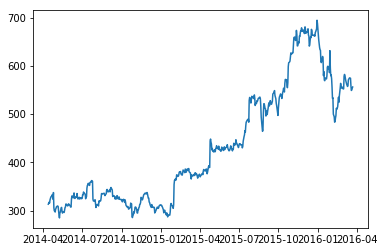

In [157]:
plt.plot(predictions1)

plt.show()

In [162]:
from sklearn.metrics import mean_squared_error


error=mean_squared_error(train1[train1.index>='2014-04-13'], predictions1)


In [163]:
print error

55.876333325836725
